In [2]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

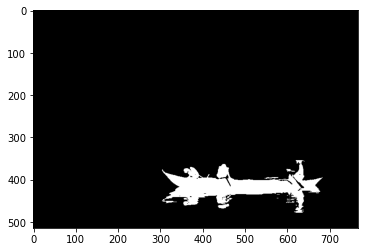

In [3]:
#1
img = cv.imread('boat.jpg', 0)   # 0 means grayscale

# Otsu's threshold
ret, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(th2,'gray')

plt.show()

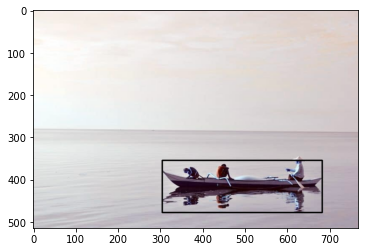

In [4]:
#1
img = cv.imread('boat.jpg')   # 0 means grayscale
where = np.array(np.where(th2))

x1, y1 = np.amin(where, axis=1)
x2, y2 = np.amax(where, axis=1)


sub_image = img[x1:x2, y1:y2]
res1= cv.rectangle(img,(y1,x1),(y2,x2),0,2,cv.LINE_AA)
plt.imshow(res1,'gray')

plt.show()

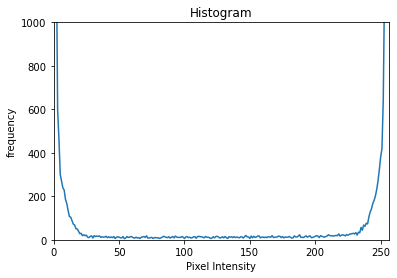

In [5]:
#2
img = cv.imread('leaf.jfif',0)
hist = cv.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist)
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('frequency')
plt.show()


In [6]:
#2
ret, th = cv.threshold(img,125,255,cv.THRESH_BINARY)
#trackback GUI callback
def trackbar(x):
    struc_ele = np.ones((x,x), dtype = np.uint8)
    erode= cv.erode(th,struc_ele, iterations = 1)
    dilate= cv.dilate(th,struc_ele, iterations = 1)
    opening = cv.morphologyEx(th, cv.MORPH_OPEN, struc_ele)
    closing = cv.morphologyEx(th, cv.MORPH_CLOSE, struc_ele)

    cv.imshow('window',np.hstack([erode,dilate,opening,closing]))

    

cv.namedWindow('window')
cv.createTrackbar('threshold','window',0,50,trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

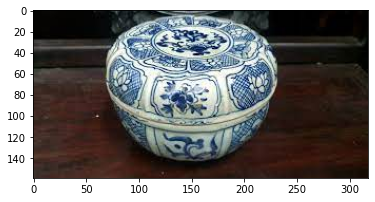

In [8]:
img = cv.imread('porcelain1.jfif')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

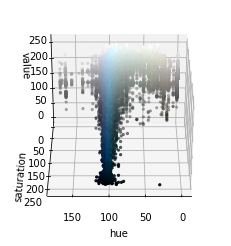

In [63]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

#hsv color space
img_hsv= cv.cvtColor(img,cv.COLOR_RGB2HSV)

h,s,v = cv.split(img_hsv)
flg = plt.figure()
axis = flg.add_subplot(1,1,1,projection = "3d")

#normalize the color range to show color for each pixel
pixel_colors = img.reshape((img.shape[0]*img.shape[1],3))
norm = colors.Normalize(vmin = 0, vmax = 1)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

#Plot
axis.scatter(h.flatten(),s.flatten(),v.flatten(),facecolor = pixel_colors,
            marker = ".")
axis.view_init(30,90)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show

dark blue(0,25,100) light blue(100,255,255)
dark white(240,240,240) light white(255,255,255)

<function matplotlib.pyplot.show(close=None, block=None)>

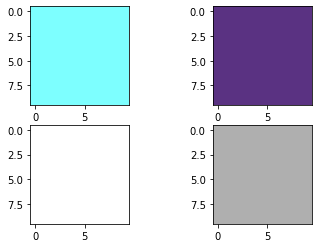

In [76]:
#assure/ verify that the hsv that I determined
dark_blue=(90,50,130) 
light_blue=(125,255,255)
dark_white=(175,175,175) 
light_white=(255,255,255)
square_lightb = np.full((10,10,3),light_blue,dtype= np.uint8)/255.0
square_darkb = np.full((10,10,3),dark_blue,dtype= np.uint8)/255.0
square_lightw = np.full((10,10,3),light_white,dtype= np.uint8)/255.0
square_darkw = np.full((10,10,3),dark_white,dtype= np.uint8)/255.0
plt.subplot(2,2,1)
plt.imshow(square_lightb)
plt.subplot(2,2,2)
plt.imshow(square_darkb)
plt.subplot(2,2,3)
plt.imshow(square_lightw)
plt.subplot(2,2,4)
plt.imshow(square_darkw)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

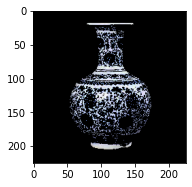

In [80]:
#RGB
img = cv.imread('porcelain2.jfif')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
mask1 = cv.inRange(img,dark_blue,light_blue)
mask2 = cv.inRange(img,dark_white,light_white)
res1= cv.bitwise_and(img,img,mask=mask1)
res2= cv.bitwise_and(img,img,mask=mask2)

mask3=mask1+mask2
res3= cv.bitwise_and(img,img,mask=mask3)

plt.subplot(1,2,1)
plt.imshow((res3))
plt.show

 Original images and its segmentation result


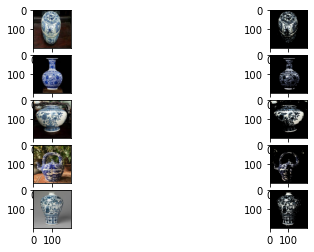

In [96]:
#3
img = np.empty(5, dtype=object)
res = np.empty(5, dtype=object)

for n in range(0, 5):
    text ='porcelain'+str(n+1)+'.jfif'    
    img[n]=cv.imread(text)
    img[n] = cv.cvtColor(img[n],cv.COLOR_BGR2RGB)
    img[n] = cv.resize(img[n], (200,200), interpolation = cv.INTER_LINEAR)
    mask1 = cv.inRange(img[n],dark_blue,light_blue)
    mask2 = cv.inRange(img[n],dark_white,light_white)
    res1= cv.bitwise_and(img[n],img[n],mask=mask1)
    res2= cv.bitwise_and(img[n],img[n],mask=mask2)

    mask3=mask1+mask2
    res[n]= cv.bitwise_and(img[n],img[n],mask=mask3)

images = [img[0], 0, res[0],
          img[1], 0, res[1],
          img[2], 0, res[2],
          img[3], 0, res[3],
          img[4], 0, res[4]]    
print(' Original images and its segmentation result')
for i in range(5):
    plt.subplot(5, 3, i*3+1), plt.imshow(images[i*3], 'gray')
    plt.subplot(5, 3, i*3+3), plt.imshow(images[i*3+2], 'gray')
    
plt.show()